# Logistic Regression

In this notebook, we apply logistic regression, a supervised machine learning method to make classification. Two different way of coding are applied in this algorithm, one is directly using SingleNeuron codes with modifications, another one is manually coding.

We apply the algorithm on the penguin dataset to do classification, both method have perfect performance.

In [120]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.txt")
df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [121]:
df.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


Have a data vidualization.

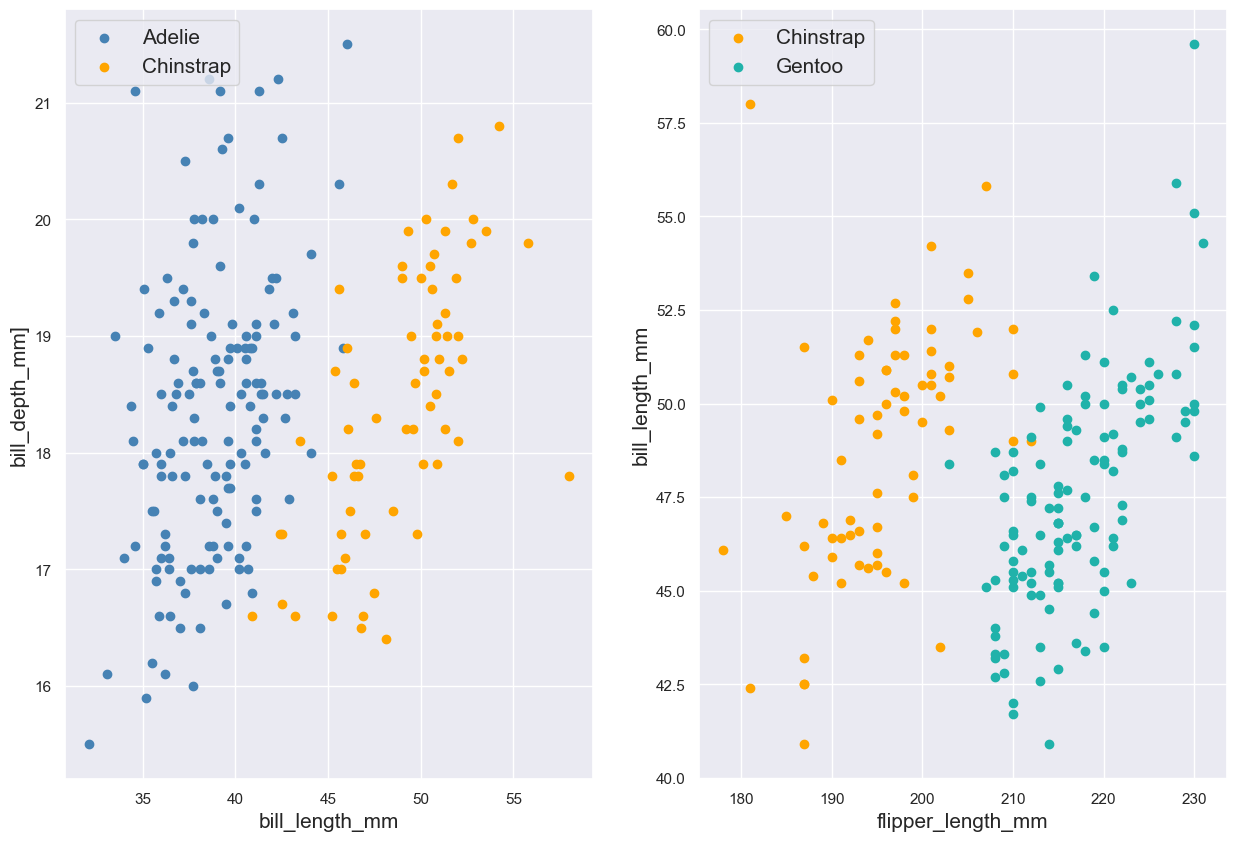

In [122]:
ad = df[df["species"]=="Adelie"]
ch = df[df["species"]=="Chinstrap"]
ge = df[df["species"]=="Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(ad.bill_length_mm, 
            ad.bill_depth_mm, 
            color = "steelblue", 
            label = "Adelie")
ax1.scatter(ch.bill_length_mm, 
            ch.bill_depth_mm, 
            color = "orange", 
            label = "Chinstrap")
ax1.set_xlabel("bill_length_mm", fontsize = 15)
ax1.set_ylabel("bill_depth_mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")

ax2.scatter(ch.flipper_length_mm, 
            ch.bill_length_mm, 
            color = "orange", 
            label = "Chinstrap")
ax2.scatter(ge.flipper_length_mm, 
            ge.bill_length_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
ax2.set_xlabel("flipper_length_mm", fontsize = 15)
ax2.set_ylabel("bill_length_mm", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
plt.show()

According to the plot, we decide to extract 'bill depth' and 'flipper length' as our variables, doing classification between Adelie and Gentoo penguin.

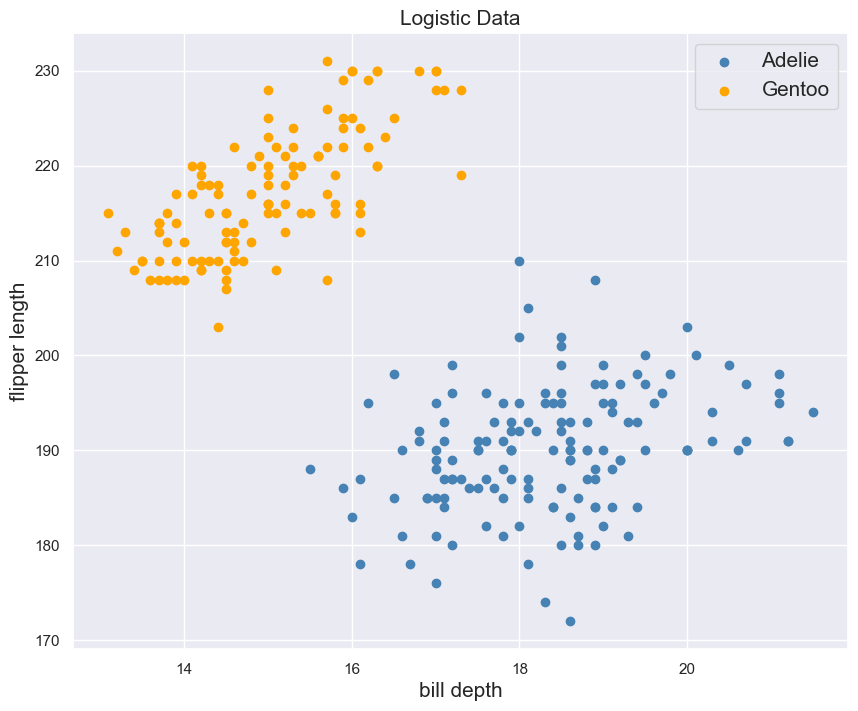

In [10]:
plt.figure( figsize = (10,8))
plt.scatter(ad.bill_depth_mm,
           ad.flipper_length_mm,
           color = "steelblue", 
        label = "Adelie")
plt.scatter(ge.bill_depth_mm,
           ge.flipper_length_mm,
           color = "orange", 
        label = "Gentoo")
plt.xlabel("bill depth", fontsize = 15)
plt.ylabel("flipper length", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Logistic Data", fontsize = 15)
plt.show()

In [11]:
X = pd.concat([ad[['species','bill_depth_mm','flipper_length_mm']],
                   ge[['species','bill_depth_mm','flipper_length_mm']]])
y = np.where(X.species == "Adelie", 0, 1)
X_two = X[['bill_depth_mm','flipper_length_mm']].values

# split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_two, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 3)

### Logistic Regression Single Neuron Model

In [12]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the pre-activation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean squared error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [123]:
# sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

#cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

/var/folders/_b/hcwjc0m51vz15mg59fc88h5r0000gn/T/ipykernel_36738/3686059045.py:7: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/_b/hcwjc0m51vz15mg59fc88h5r0000gn/T/ipykernel_36738/3686059045.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


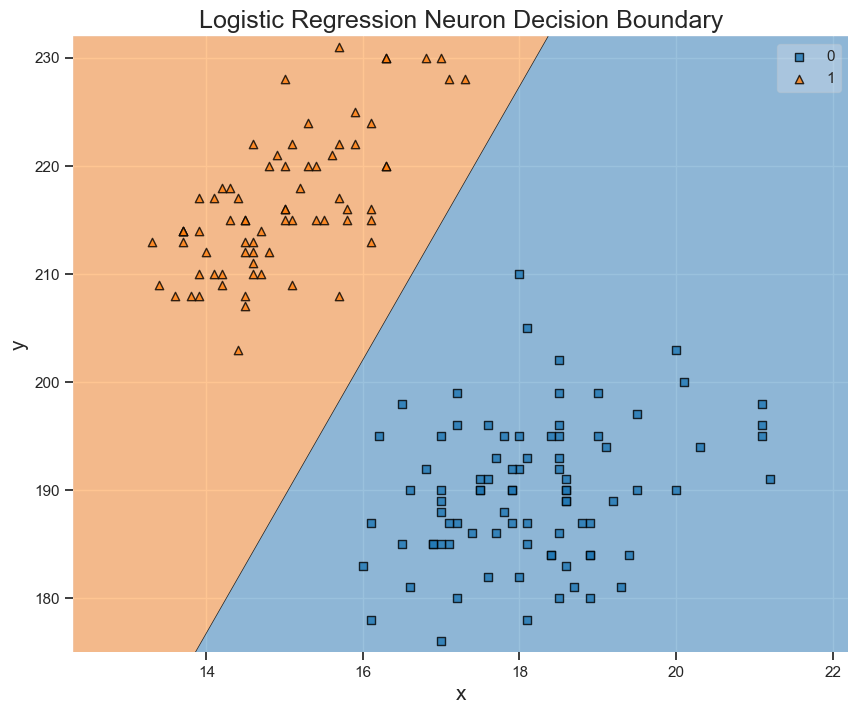

In [124]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively.
node_two.train(X_train, y_train, alpha = 0.01, epochs = 5000)
# Train the new single neuron model on the new feature vectors.
node_two.plot_decision_boundary(X_train, y_train)

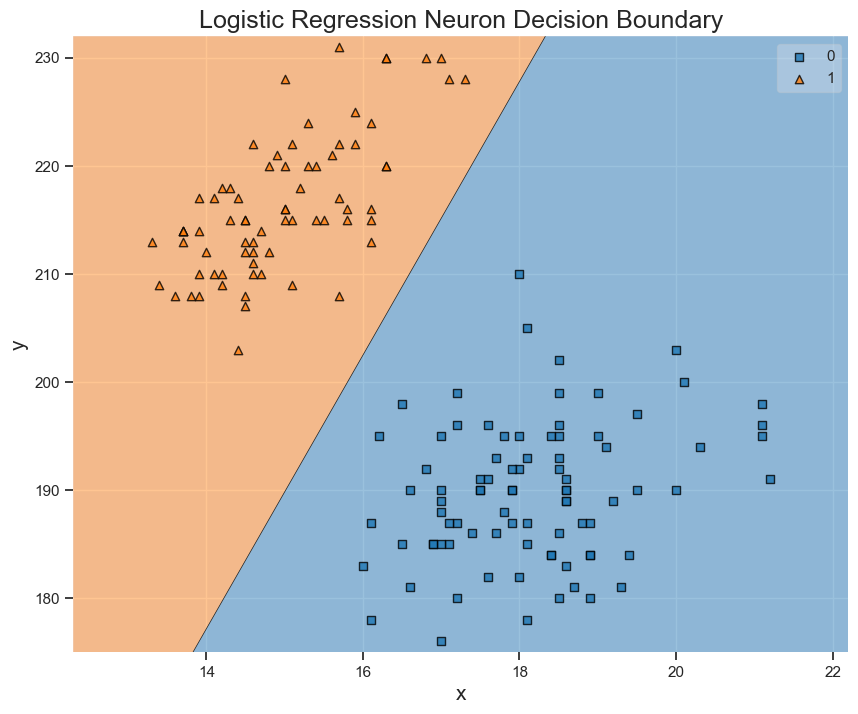

In [18]:
node_two.plot_decision_boundary(X_train, y_train)

#### Confusion Matrix

According to the prediction accuracy, we could this classification model works well, which corresponds to the former plot.

In [127]:
classification_accuracy = (np.rint(node_two.predict(X_test)) == y_test).astype(int)
print(f"Classification Accuracy = {sum(classification_accuracy)/ len(y_test)}")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f"Logistic Regression Classification Report")
print(classification_report(y_test, np.rint(node_two.predict(X_test))), "\n")

confusion_m = confusion_matrix(y_test, np.rint(node_two.predict(X_test)))

Classification Accuracy = 1.0
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        46

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106
 



### Logistic Regression Single Neuron Model (manually)

In [140]:
import numpy as np

class LogisticRegression:
    """
    A class to implement logistic regression.
    """
    
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        """
        Initialize the model.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize the weight
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dz = y_pred - y
            dw = np.dot(X.T, dz) / n_samples
            db = np.mean(dz)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        
    def predict(self, X):
        """
    Predict the class labels of the penguins.
        """

        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred > .5).astype(int)


Firstly, we explore the classification accuracy for one variable "bill_length_mm" for Adelie and Gentoo, according to the result, we could see the accuracy is already really high.

In [146]:
# Train the logistic regression model
data = df[df.species != "Chinstrap"].reset_index(drop = True)
X = np.array(data[["bill_length_mm"]])
y = (data["species"] == "Adelie").astype(int)

lr = LogisticRegression()
lr.fit(X, y)

In [147]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X)
# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9207547169811321


However, only choosing this variable to classify Adelie and Ch

In [148]:
data = df[df.species != "Gentoo"].reset_index(drop = True)
X = np.array(data[["bill_length_mm"]])
y = (data["species"] == "Adelie").astype(int)

lr = LogisticRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
accuracy = accuracy_score(y, y_pred)
confusion_mat = confusion_matrix(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6822429906542056


In [108]:
class LogisticRegression():
    """

    """
    def __init__(self):
        self.weights = None
        self.train_errors = []
        self.rate = 0.01
        self.iterations = 0
    
    def sigmoid(self, z):
        """
        
        """

        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, rate=0.05, iterations=1000):
        """
        Train a logistic regression model

        Parameters
        ----------
        X: matrix of feature values
        y: array of observed values
        rate (float): learning rate
        iterations (int): number of iterations to train the model for

        Returns: None
        """
        n_obs, n_features = X.shape
        self.rate = rate
        self.iterations = iterations
        self.train_errors = []

        # Initialize coefficients/weights and intercept/bias from a uniform distribution
        self.weights = np.random.rand(n_features + 1)
        
        # Implement stochastic gradient decent
        for _ in range(iterations):
            total_error = 0
            for i in range(0, n_obs):
                err = self.predict(X[i,]) - y[i]
                self.weights -= rate * err * np.insert(X[i,], 0, 1)
                total_error += self.entropy_loss(self.predict(X[i,]), y[i])
            self.train_errors.append(total_error / n_obs)
    
    def entropy_loss(self, y_hat, y):
        return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
    
    def predict_prob(self, x):
        x = np.insert(x, 0, 1)
        return self.sigmoid(np.dot(x, self.weights))
    
    def predict(self, x, threshold=0.5):
        return self.predict_prob(x) >= threshold